## Metodos no supervisados

Módulo "Star and Planet Formation"

- Sco-Cen Association https://www.cosmos.esa.int/web/gaia/dr2
- Gaia DR2 info https://www.cosmos.esa.int/web/gaia/dr2
- Gaia data model https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html
- Gaussian Mixture from sklearn http://scikit-learn.org/stable/modules/mixture.html


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [11]:
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

In [12]:
gas=pd.read_csv("sco-cen.csv",index_col=0)

In [13]:
np.unique(gas.id)

array([1., 2., 3., 4., 5.])

In [14]:
gas.head()

,x,y,z,vx,vy,vz,xa,ya,za,id
0,-97.194204,-85.197691,-88.438109,6.158076,213.199731,2.396119,-8177.220968,-76.188003,87.482545,1.0
1,-42.552635,-87.704235,-78.201006,6.114842,212.755781,2.094273,-8183.120524,-40.427102,45.255358,1.0
2,-56.618763,-94.316484,-82.573662,4.171674,212.820311,2.174304,-8174.420201,-47.702305,56.747690,1.0
3,-76.672044,-59.663928,-96.309322,5.310793,212.972091,4.034915,-8196.926817,-83.285586,61.093306,1.0
4,-37.592208,-75.046785,-86.366686,6.777685,211.303613,2.055336,-8190.531598,-49.706114,34.744833,1.0


Text(0.5, 0, 'z (pc)')

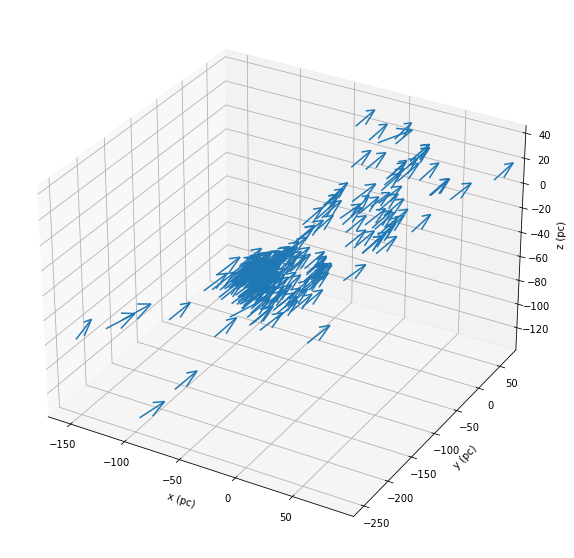

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
norm=5
ax.quiver(gas.x,gas.y,gas.z,gas.vx/norm,gas.vy/norm,gas.vz/norm,arrow_length_ratio=0.5)
ax.set_xlabel("x (pc)")
ax.set_ylabel("y (pc)")
ax.set_zlabel("z (pc)")

In [16]:
X=gas[['x','y','z','vz','vy','vz']]

In [9]:
gmm = GMM(2, covariance_type='full', random_state=0)

NameError: name 'GMM' is not defined

In [52]:
gmm.fit(X)

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=0,
  tol=0.001, verbose=0)

In [53]:
label=gmm.predict(X)

In [54]:
len(label)

220

In [48]:
label

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
C0=gas[label==0]

In [70]:
C1=gas[label==1]

In [ ]:
C0 = gas con la condición de que sólo me muestre los 
     datos correspondientes al cluster 0

In [ ]:
C1 = gas con la condición de que sólo me muestre los 
     datos correspondientes al cluster 0

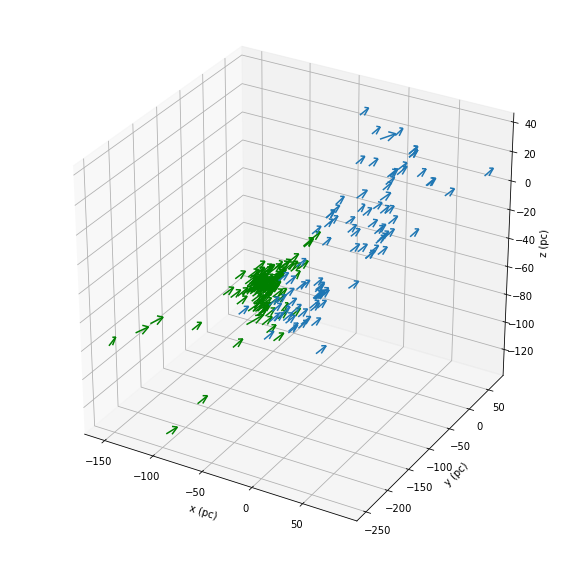

In [73]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
norm=10
ax.quiver(C0.x,C0.y,C0.z,C0.vx/norm,C0.vy/norm,C0.vz/norm,arrow_length_ratio=0.5)
ax.quiver(C1.x,C1.y,C1.z,C1.vx/norm,C1.vy/norm,C1.vz/norm,arrow_length_ratio=0.5,color='g')
ax.set_xlabel("x (pc)")
ax.set_ylabel("y (pc)")
ax.set_zlabel("z (pc)")